# HW 9


## What about pdfs?

Often when we are analyzing text from the internet or journals, the document is rendered as a pdf. PDF stands for "portable document format" and was first developed by Adobe in the 90s and they used to be tough to convert to text but...not any more! Let's look at some ways we can do this: 

### Pdf extraction technique 1: curl
curl is a command-line tool used to transfer data to and from a server using various network protocols. It’s commonly used for making HTTP requests, and it's widely available on Unix-like operating systems, including Linux and macOS. It also works in windows, don't worry! 

Curl is extremely versatile and supports many protocols, such as HTTP, HTTPS, FTP, and more, making it useful for tasks like downloading files, interacting with APIs, and even testing servers.
t 
Here is a pdf of a Conference Call of the Federal Open Market Committee on 
January 21, 2008  www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf 

Let's extract the text:

In [4]:
#Your code here:
!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  628k  100  628k    0     0  2984k      0 --:--:-- --:--:-- --:--:-- 3021k


In [13]:
## Run this code:
from pypdf import PdfReader

reader = PdfReader("FOMC20080121confcall.pdf")
number_of_pages = len(reader.pages)
text = ''.join([page.extract_text() for page in reader.pages])
print(text)

Conference Call of the Federal Open Market Committee on 
January 21, 2008 
 
A conference call of the Federal Open Market Committee was held on Monday, January 
21, 2008, at 6:00 p.m.  Those present were the following: 
 
Mr. Bernanke, Chairman 
Mr. Geithner, Vice Chairman 
Mr. Evans 
Mr. Hoenig 
Mr. Kohn 
Mr. Kroszner 
Mr. Poole 
Mr. Rosengren 
Mr. Warsh 
 
Mr. Fisher, Ms. Pianalto, and Messrs. Plosser and Stern, Alternate Members of the 
Federal Open Market Committee 
 
Messrs. Lacker and Lockhart, and Ms. Yellen, Presidents of the Federal Reserve Banks 
of Richmond, Atlanta, and San Francisco, respectively 
 
Mr. Madigan, Secretary and Economist 
Ms. Danker, Deputy Secretary 
Mr. Skidmore, Assistant Secretary 
Ms. Smith, Assistant Secretary 
Mr. Alvarez, General Counsel 
Mr. Baxter, Deputy General Counsel 
Mr. Sheets, Economist 
Mr. Stockton, Economist 
 
Messrs. Clouse, Connors, Kamin, Sullivan, and Wilcox, Associate Economists 
 
Mr. Dudley, Manager, System Open Market Account 
 


## Problem with curl...it doesn't always work!
Sometimes issues will arise when using curl. These can stem from problems with redirects from the website, or a deliberate defense against scraping. There is, however, ways around this. 

### Using requests method

In [7]:
#run this code:
!curl -O https://arxiv.org/abs/2212.08073

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 55799  100 55799    0     0   387k      0 --:--:-- --:--:-- --:--:--  394k


In [8]:
## Run this code:
from pypdf import PdfReader

reader = PdfReader("2212.08073")
number_of_pages = len(reader.pages)
text = ''.join([page.extract_text() for page in reader.pages])
print(text)

invalid pdf header: b'<?xml'
EOF marker not found


PdfStreamError: Stream has ended unexpectedly

This throws an error "Stream has ended unexpectedly" Let's try this another way.

Here is an article on "Constitutional AI" from the folks at Anthropic that is their tech manifesto on ethical ai:
"https://arxiv.org/pdf/2212.08073.pdf"

In [47]:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Step 1: Fetch the PDF directly from arXiv
url = "https://arxiv.org/pdf/2212.08073.pdf"
response = requests.get(url)

# Check if the response is a PDF
if response.headers['Content-Type'] == 'application/pdf':
    pdf_file = BytesIO(response.content)
    
    # Step 2: Read the PDF content
    reader = PdfReader(pdf_file)
    document_text = ""
    for page in reader.pages:
        document_text += page.extract_text()
    
    # Display the first 500 characters to verify content
    print(document_text[:500])
else:
    print("Failed to download PDF. Received content type:", response.headers['Content-Type'])


Constitutional AI: Harmlessness from AI Feedback
Yuntao Bai, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson Kernion,
Andy Jones, Anna Chen, Anna Goldie, Azalia Mirhoseini, Cameron McKinnon,
Carol Chen, Catherine Olsson, Christopher Olah, Danny Hernandez, Dawn Drain,
Deep Ganguli, Dustin Li, Eli Tran-Johnson, Ethan Perez, Jamie Kerr, Jared Mueller,
Jeffrey Ladish, Joshua Landau, Kamal Ndousse, Kamile Lukosuite, Liane Lovitt,
Michael Sellitto, Nelson Elhage, Nicholas Schiefer, Noemi Merc


Great! That worked!! 

## Lets apply what we have learned on the 2008 Crisis and the Fed
The global financial crisis (GFC) refers to the period of extreme stress in global financial markets and banking systems between mid 2007 and early 2009. During the GFC, a downturn in the US housing market was a catalyst for a financial crisis that spread from the United States to the rest of the world through linkages in the global financial system. Many banks around the world incurred large losses and relied on government support to avoid bankruptcy. Millions of people lost their jobs as the major advanced economies experienced their deepest recessions since the Great Depression in the 1930s.

The Federal Reserve conference calls are a good way to track the sentiment that the Fed had toward the crisis. Did they know how bad it was? Did they think they could fix it? Starting in January of 2008, ending in October of 2008 map the sentiment of the Fed reserve calls.

Here are your documents: Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf


You will need to convert these pdf into text to process.

In [9]:
# Your code here:

!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf
!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf
!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf
!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf
!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  628k  100  628k    0     0  2247k      0 --:--:-- --:--:-- --:--:-- 2268k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  670k  100  670k    0     0  3109k      0 --:--:-- --:--:-- --:--:-- 3177k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  5  718k    5 40039    0     0   135k      0  0:00:05 --:--:--  0:00:05  136k
100  718k  100  718k    0     0  1945k      0 --:

In [15]:
reader = PdfReader("FOMC20080121confcall.pdf")
number_of_pages = len(reader.pages)
jan2008 = ''.join([page.extract_text() for page in reader.pages[2:]]) #start on page 3
print(jan2008[:100])

Transcript of the Federal Open Market Committee Conference Call on 
January 21, 2008 
 
CHAIRMAN BER


In [47]:
reader = PdfReader("FOMC20080310confcall.pdf")
number_of_pages = len(reader.pages)
mar2008 = ''.join([page.extract_text() for page in reader.pages[2:]]) #start on page 3
print(mar2008[:100])

Transcript of the Federal Open Market Committee Conference Call on  
March 10, 2008  
 
CHAIRMAN BER


In [50]:
reader = PdfReader("FOMC20080724confcall.pdf")
number_of_pages = len(reader.pages)
jul2008 = ''.join([page.extract_text() for page in reader.pages[2:]]) #start on page 3
print(jul2008[:100])

Transcript of the Federal Open Market Committee Conference Call on  
July 24, 2008 
 
MR. KOHN.  I m


In [51]:
reader = PdfReader("FOMC20080929confcall.pdf")
number_of_pages = len(reader.pages)
sept2008 = ''.join([page.extract_text() for page in reader.pages[2:]]) #start on page 3
print(sept2008[:100])

Transcript of the Federal Open Market Committee Conference Call on  
September 29, 2008  
 
CHAIRMAN


In [54]:
reader = PdfReader("FOMC20081007confcall.pdf")
number_of_pages = len(reader.pages)
oct2008 = ''.join([page.extract_text() for page in reader.pages[2:]]) #start on page 3
print(oct2008[:100])

Transcript of the Federal Open Market Committee Conf erence Call on  
October 7, 2008 
 
CHAIRMAN BE


Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.


In [56]:
#Your code here:
# Import necessary packages
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [57]:
stopwords = nltk.corpus.stopwords.words('english')

# Define the tokenizer function
def tokenizer(text):
    ''' function to convert text to lowercase, tokenize, and remove stopwords '''
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords]
    return filtered_tokens

# Apply the tokenizer to your text
jan2008_tokenized = tokenizer(jan2008)
mar2008_tokenized = tokenizer(mar2008)
jul2008_tokenized = tokenizer(jul2008)
sept2008_tokenized = tokenizer(sept2008)
oct2008_tokenized = tokenizer(oct2008)

# Print check one transcript
print(jan2008_tokenized[:100])

['transcript', 'federal', 'open', 'market', 'committe', 'e', 'conference', 'call', 'january', 'chairman', 'bernanke', 'good', 'afternoon', 'everybody', 'thank', 'taking', 'time', 'holiday', 'purpose', 'meeting', 'update', 'committee', 'financial', 'developments', 'weekend', 'consider', 'whether', 'want', 'take', 'policy', 'action', 'today', 'would', 'like', 'start', 'brief', 'update', 'markets', 'bill', 'dudley', 'take', 'questions', 'introduce', 'issue', 'make', 'recommendation', 'ask', 'comments', 'following', 'bill', 'would', 'like', 'give', 'us', 'short', 'review', 'dudley', 'thank', 'chairman', 'since', 'videoconference', 'january', 'market', 'functioning', 'terms', 'bank', 'term', 'funding', 'markets', 'generally', 'continued', 'improve', 'libor', 'relative', 'overnight', 'index', 'swap', 'rates', 'coming', 'back', 'sharply', 'narrow', 'since', 'market', 'turmoil', 'began', 'elsewhere', 'terms', 'market', 'functioning', 'started', 'see', 'step', 'backward', 'last', 'week', 'late'

[('think', 89), ('markets', 67), ('market', 62), ('chairman', 57), ('would', 56), ('financial', 47), ('going', 43), ('inflation', 42), ('thank', 41), ('january', 39), ('rate', 37), ('president', 37), ('today', 36), ('meeting', 33), ('basis', 32), ('move', 32), ('much', 31), ('points', 28), ('bernanke', 26), ('us', 26)]


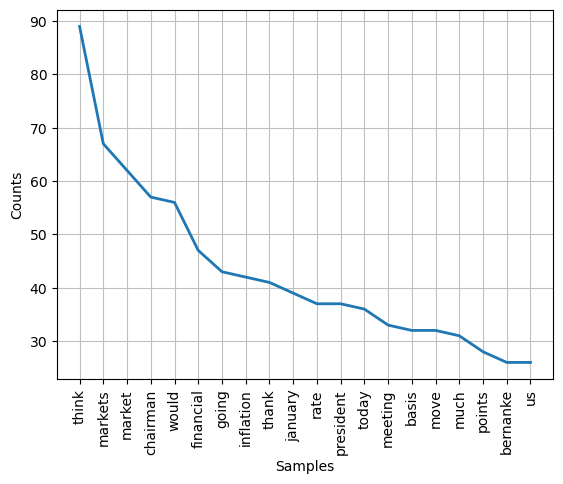

Axes(0.125,0.11;0.775x0.77)


In [60]:
# Display top 20 most frequently-appearing words

fdist1 = FreqDist(jan2008_tokenized)

fdist1_top20 = fdist1.most_common(20)
print(fdist1_top20)

print(fdist1.plot(20))

[('would', 90), ('think', 86), ('chairman', 77), ('market', 73), ('securities', 57), ('markets', 52), ('collateral', 51), ('president', 44), ('bernanke', 42), ('march', 41), ('going', 41), ('thank', 40), ('liquidity', 38), ('term', 37), ('federal', 36), ('primary', 36), ('program', 34), ('risk', 33), ('dealers', 32), ('lending', 30)]


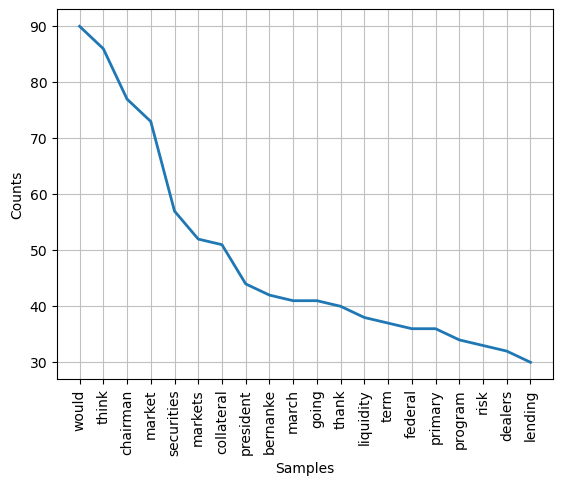

Axes(0.125,0.11;0.775x0.77)


In [62]:
fdist2 = FreqDist(mar2008_tokenized)

fdist2_top20 = fdist2.most_common(20)
print(fdist2_top20)

print(fdist2.plot(20))

[('would', 173), ('think', 122), ('chairman', 85), ('collateral', 77), ('president', 77), ('credit', 69), ('taf', 57), ('term', 56), ('going', 55), ('us', 55), ('bernanke', 54), ('july', 51), ('thank', 50), ('tslf', 48), ('billion', 45), ('make', 44), ('primary', 44), ('auction', 43), ('days', 43), ('loan', 42)]


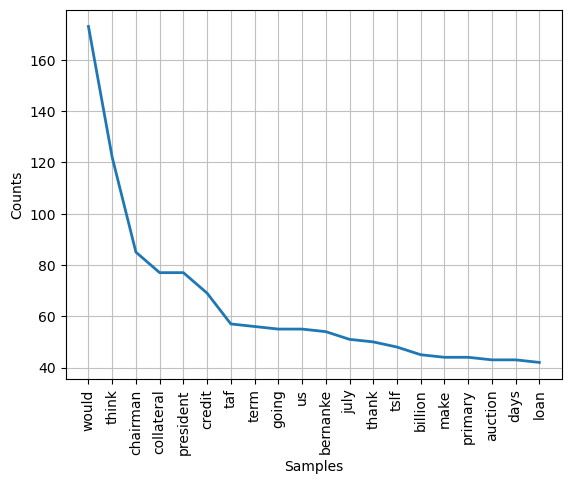

Axes(0.125,0.11;0.775x0.77)


In [64]:
fdist3 = FreqDist(jul2008_tokenized)

fdist3_top20 = fdist3.most_common(20)
print(fdist3_top20)

print(fdist3.plot(20))

[('billion', 65), ('chairman', 41), ('would', 28), ('bernanke', 22), ('reserves', 22), ('rate', 22), ('market', 20), ('bank', 20), ('increase', 18), ('swap', 18), ('taf', 18), ('funds', 18), ('wachovia', 17), ('think', 17), ('president', 17), ('take', 16), ('banks', 16), ('federal', 15), ('september', 15), ('thank', 15)]


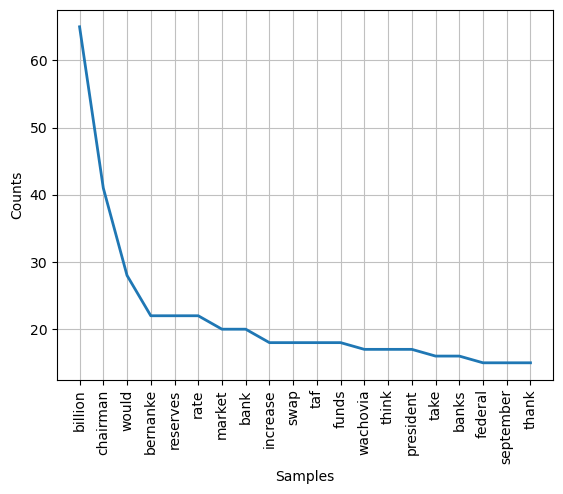

Axes(0.125,0.11;0.775x0.77)


In [66]:
fdist4 = FreqDist(sept2008_tokenized)

fdist4_top20 = fdist4.most_common(20)
print(fdist4_top20)

print(fdist4.plot(20))

[('think', 82), ('chairman', 73), ('thank', 45), ('financial', 45), ('inflation', 44), ('would', 43), ('markets', 40), ('market', 39), ('going', 38), ('bernanke', 34), ('rate', 32), ('banks', 31), ('october', 30), ('central', 27), ('basis', 27), ('percent', 27), ('point', 27), ('president', 27), ('action', 26), ('statement', 26)]


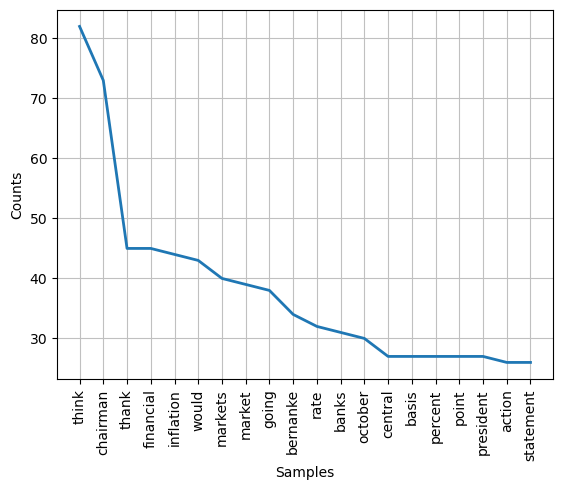

Axes(0.125,0.11;0.775x0.77)


In [68]:
fdist5 = FreqDist(oct2008_tokenized)

fdist5_top20 = fdist5.most_common(20)
print(fdist5_top20)

print(fdist5.plot(20))

Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?


In [70]:
#Your code here and EXPLANATION here:

# Combine all tokenized calls
all_2008 = jan2008_tokenized + mar2008_tokenized + jul2008_tokenized + sept2008_tokenized + oct2008_tokenized

# Custom dictionary of "unprecedented" terms
unprecedented_terms = [
    "unprecedented", "extraordinary", "historic", "unique", "unparalleled",
    "exceptional", "catastrophic", "severe", "unusual", "extreme", "unknown", "unpredictable",
    "monumental", "epochal", "unmatched", "groundbreaking", "uncharted",
    "remarkable", "transformative", "radical", "extreme"]

# See which of these terms appear in the calls
matched_terms = [term for term in unprecedented_terms if term in text]

print(matched_terms)

['extraordinary', 'severe']


In [72]:
# Tokenized sentences

def tokenize_by_sentence(text):
    """ Tokenizes the input text into sentences, then tokenizes each sentence into words """
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Tokenize each sentence into words
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    
    return tokenized_sentences

# Apply the tokenizer to your text
jan2008_sent_tokenized = tokenize_by_sentence(jan2008)
mar2008_sent_tokenized = tokenize_by_sentence(mar2008)
jul2008_sent_tokenized = tokenize_by_sentence(jul2008)
sept2008_sent_tokenized = tokenize_by_sentence(sept2008)
oct2008_sent_tokenized = tokenize_by_sentence(oct2008)

# Print check one transcript
print(jan2008_sent_tokenized[:10])

[['Transcript', 'of', 'the', 'Federal', 'Open', 'Market', 'Committe', 'e', 'Conference', 'Call', 'on', 'January', '21', ',', '2008', 'CHAIRMAN', 'BERNANKE', '.'], ['Good', 'afternoon', ',', 'everybody', '.'], ['Thank', 'you', 'for', 'taking', 'time', 'on', 'your', 'holiday', '.'], ['The', 'purpose', 'of', 'this', 'meeting', 'is', 'to', 'update', 'the', 'Committee', 'on', 'financial', 'developments', 'over', 'the', 'weekend', 'and', 'to', 'consider', 'whether', 'we', 'want', 'to', 'take', 'a', 'policy', 'action', 'today', '.'], ['I', 'would', 'like', 'to', 'start', 'with', 'a', 'brief', 'update', 'on', 'the', 'markets', 'from', 'Bill', 'Dudley', 'and', 'take', 'any', 'questions', 'for', 'him', ',', 'and', 'then', 'I', 'will', 'introduce', 'the', 'issue', ',', 'make', 'a', 'recommendation', ',', 'and', 'ask', 'for', 'your', 'comments', 'following', 'that', '.'], ['Bill', ',', 'would', 'you', 'like', 'to', 'give', 'us', 'a', 'short', 'review', '?'], ['MR.', 'DUDLEY', '.'], ['Thank', 'you'

In [74]:
# Combine all calls tokenized by sentence
all_tokenized_sents = jan2008_sent_tokenized + mar2008_sent_tokenized + jul2008_sent_tokenized + sept2008_sent_tokenized + oct2008_sent_tokenized

# Define the target words
target_words = ['extraordinary', 'severe']

# Find sentences that contain either of the target words
matching_sentences = []

for sentence in all_tokenized_sents:
    words_lower = [word.lower() for word in sentence]  # Convert to lowercase
    
    # Check if any of the target words appear in the sentence
    if any(word in words_lower for word in target_words):
        matching_sentences.append(' '.join(sentence))  # Join words back into a sentence

# Print the matching sentences
print(len(matching_sentences))
print(matching_sentences)

19
['I hope to be able to talk next week more about a simulation the staff is working on , which shows that a severe recession would create extraordinary credit losses for our financial institutions , with implications obviously for credit extension and for financial stability .', 'I think the risk of a severe recession and credit crisis is unacceptably high , and it is being clearly priced now into not only domestic but also global markets .', 'We also need a cushion against severe downside r isks .', 'I am concerned also how severe a recession could be .', 'But the words “ severe recession ” I have yet to hear from the lips of anybody but those in the housing business , and for them , it gets more severe with each passing moment .', 'We don ’ t know what they are considering , but just to anticipate my response to some of these comments , I think the situation in the United States , the fundamental situation , is much more severe at this juncture than in Europe or the United Kingdom 

I first had ChatGPT create a custom dictionary of words that spoke to the unprecedented nature of the GFC. Then, I pulled out all the sentences in the Fed meeting transcripts in which the custom dictionary words appeared. Only two of my dictionary words ended up appearing ("extraordinary" and  "severe"), and these words appeared a total of 19 times. Pretty much all of the times in which they are used, they point to the severity of the GFC. 

I had initially planned to use the words in my custom dictionary that appeared in the meeting transcripts in a vector-based approach (Word2Vec) to determine what precisely was "extraordinary" or "severe," but even after removing stopwords and punctuation, the words associated with these terms were common words that were generally uninformative.

Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.


In [76]:
#Your code here:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [78]:
# Combine all meeting transcripts without tokenization
allcalls_notokens = jan2008 + mar2008 + jul2008 + sept2008 + oct2008

In [80]:
# Analyze sentiment intensity in all 2008 meeting transcripts
score = analyzer.polarity_scores(allcalls_notokens)

print(score)

{'neg': 0.055, 'neu': 0.82, 'pos': 0.125, 'compound': 1.0}


I struggled to create a custom dictionary for this one as there weren't too many instances of positive words (or words associated with "quick" or "easy" being used in a positive way) I could find while skimming the transcripts. Instead, I performed a sentiment analysis to see if I could extract any evidence. The sentiment analysis reveals greater positive sentiment than negative sentiment expressed in the transcripts, but I don't think we can glean much from this exercise. Sentiment analysis finds the overwhelming majority of the transcript contents to be neutral, and this is likely due to the complexity of the sentences and a lack of context into the nature of the crisis that the senitment intensity analyzer does not possess.

Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?

In [81]:
# Pick out strings in all caps to identify speaker names

import re

def unique_all_caps_words(text):
    ''' function to find all unique capitialized words '''
    # Find all words in all caps
    all_caps_words = re.findall(r'\b[A-Z]+\b', text)
    # Convert to a set to remove duplicates and then back to a list
    unique_all_caps_words = list(set(all_caps_words))
    # Return the result
    return unique_all_caps_words

print(unique_all_caps_words(jan2008))
print(unique_all_caps_words(mar2008))
print(unique_all_caps_words(jul2008))
print(unique_all_caps_words(sept2008))
print(unique_all_caps_words(oct2008))

['BERNANKE', 'MS', 'U', 'OF', 'WARSH', 'DANKER', 'PLOSSER', 'CHAIRMAN', 'KE', 'D', 'E', 'PIANALTO', 'GEITHNER', 'MR', 'T', 'LIBOR', 'KROSZNER', 'CEO', 'AAA', 'END', 'HOENIG', 'W', 'NB', 'AC', 'VICE', 'FOMC', 'KOHN', 'L', 'B', 'EVANS', 'I', 'H', 'MEETING', 'O', 'S', 'LACKER', 'POOLE', 'M', 'OMC', 'TOXX', 'YELLEN', 'A', 'II', 'TAF', 'CPI', 'LOCKHART', 'DUDLEY', 'ECB', 'F', 'FISHER', 'ER', 'ROSENGREN', 'BERNAN', 'MBIA', 'STERN', 'PCE', 'P']
['BERNANKE', 'CDO', 'RP', 'OMO', 'U', 'MS', 'WARSH', 'OF', 'AREZ', 'SEC', 'PLOSSER', 'CHAIRMAN', 'DANKER', 'D', 'PIANALTO', 'C', 'CGFS', 'GEITHNER', 'N', 'ALVA', 'MR', 'OIS', 'T', 'BONY', 'EURIBOR', 'SNB', 'LIBOR', 'KROSZNER', 'AAA', 'ALV', 'HOENIG', 'END', 'W', 'IRMAN', 'G', 'TSLF', 'R', 'NB', 'VICE', 'KOHN', 'FOMC', 'CHAIR', 'B', 'EVANS', 'I', 'CHA', 'MEETING', 'O', 'MAN', 'SOMA', 'PERELM', 'S', 'LACKER', 'REZ', 'M', 'UTER', 'YELLEN', 'A', 'TAF', 'MADIGAN', 'LOCKHART', 'X', 'ECB', 'DUDLEY', 'F', 'ALVAREZ', 'ROSENGREN', 'MBS', 'Y', 'FISHER']
['OF', 'C

In [84]:
# Manually create a list of speaker name strings

speaker_strings_jan = ['YELLEN', 'DUDLEY', 'KROSZNER', 'DANKER', 'FISHER', 'POOLE', 'LOCKHART', 'GEITHNER', 
                   'STERN', 'KOHN', 'WARSH', 'EVANS', 'PIANALTO', 'ROSENGREN', 'BERNANKE', 'LACKER', 
                   'PLOSSER', 'HOENIG']
speaker_strings_mar = ['ALVAREZ', 'MADIGAN', 'YELLEN', 'IRMAN', 'DUDLEY', 'KROSZNER', 'PERELM', 'DANKER', 'FISHER', 'LOCKHART', 
                      'GEITHNER', 'KOHN', 'WARSH', 'EVANS', 'PIANALTO', 'BERNANKE', 'ROSENGREN', 'HOENIG', 'PLOSSER', 'LACKER',]
speaker_strings_jul = ['KROSZNER', 'LOCKHART', 'GEITHNER', 'MISHKIN', 'KRIEGER', 'KOHN', 'BERNANKE', 'YELLEN', 'DUDLEY', 'DANKER', 
                       'EVANS', 'PIANALTO', 'HOENIG', 'ALVAREZ', 'PERELMUTER', 'ROSENBLUM', 'STERN', 'BULLARD', 'WARSH', 
                       'ROSENGREN', 'LACKER', 'PLOSSER']
speaker_strings_sept = ['ALVAREZ', 'MADIGAN','YELLEN', 'DUDLEY', 'DANKER', 'FISHER', 'GEITHNER', 'PARTICIPANT', 'EVANS', 
                        'ROSENGREN', 'BERNANKE','PLOSSER']
speaker_strings_oct = ['DUKE', 'MADIGAN', 'YELLEN', 'RASDAL', 'DUDLEY', 'KROSZNER', 'DANKER', 'FISHER', 'LOCKHART', 'GEITHNER', 
                       'RASCH', 'STERN', 'SHEETS', 'KOHN','WARSH', 'EVANS','PIANALTO', 'ROSENGREN', 'BERNANKE', 'LACKER', 
                       'PLOSSER', 'SLIFMAN']

In [86]:
# Clean up the line spacing for each transcript

jan2008_clean = " ".join(jan2008.splitlines())
mar2008_clean = " ".join(mar2008.splitlines())
jul2008_clean = " ".join(jul2008.splitlines())
sept2008_clean = " ".join(sept2008.splitlines())
oct2008_clean = " ".join(oct2008.splitlines())

print(jan2008_clean)

Transcript  of the Federal Open Market Committe e Conference Call  on  January 21, 2008    CHAIRMAN BERNANKE.  Good afternoon, everybody.  Thank you for taking time on  your holiday.  The purpose of this meeting is to update the Committee on financial developments  over the weekend and to consider whether we want to take a policy action today.  I would like to start with a brief update on the markets from Bill Dudley  and take any questions for him, and  then I will introduce the issue, make a recommendation, and ask for your comments following that.  Bill, would you like to give us a short review?    MR. DUDLEY.  Thank you, Mr. Chairman.  Since our videoconference on  January 9, the market functioning in terms of the bank term funding markets has  generally continued to improve , with  the one-month and three-month LIBOR  relative  to the overnight index swap  rates coming back very sharply.  They are now as narrow  as they’ve been since the market turmoil began.   But elsewhere in te

In [122]:
import pandas as pd

# Regular expression to match speaker names followed by their dialogue
# This will match a speaker's name, followed by any text, until the next speaker name
speaker_pattern = r"(" + "|".join(speaker_strings_jan) + r")\.(.*?)(?=(?=\s(" + "|".join(speaker_strings_jan) + r")\.|\Z))"

# Find all matches in the transcript
matches = re.findall(speaker_pattern, jan2008_clean, re.DOTALL)

# Create a list of tuples (speaker, dialogue)
dialogue_data = [(speaker, text.strip()) for speaker, text, _ in matches]

# Create a DataFrame
df_jan = pd.DataFrame(dialogue_data, columns=["Speaker", "Dialogue"])
df_jan['Date'] = pd.to_datetime("01/21/2008", format="%m/%d/%Y")

# Print the DataFrame
df_jan.head(5)


,Speaker,Dialogue,Date
0,BERNANKE,"Good afternoon, everybody. Thank you for taki...",2008-01-21
1,DUDLEY,"Thank you, Mr. Chairman. Since our videoconfe...",2008-01-21
2,BERNANKE,Are there questions for Bill? President Lacke...,2008-01-21
3,LACKER,Can you explain that third consequence of mono...,2008-01-21
4,DUDLEY,The monoline insurers don’t have to mark to ma...,2008-01-21


In [124]:
# Regular expression to match speaker names followed by their dialogue
# This will match a speaker's name, followed by any text, until the next speaker name
speaker_pattern = r"(" + "|".join(speaker_strings_mar) + r")\.(.*?)(?=(?=\s(" + "|".join(speaker_strings_mar) + r")\.|\Z))"

# Find all matches in the transcript
matches = re.findall(speaker_pattern, mar2008_clean, re.DOTALL)

# Create a list of tuples (speaker, dialogue)
dialogue_data = [(speaker, text.strip()) for speaker, text, _ in matches]

# Create a DataFrame
df_mar = pd.DataFrame(dialogue_data, columns=["Speaker", "Dialogue"])
df_mar['Date'] = pd.to_datetime("03/10/2008", format="%m/%d/%Y")

# Print the DataFrame
df_mar.head(5)

,Speaker,Dialogue,Date
0,BERNANKE,"Good evening, everybody. I am sorry, once aga...",2008-03-10
1,DUDLEY,"Thank you, Mr. Chairman. Financial conditions...",2008-03-10
2,BERNANKE,Thank you very much. We have all the staff he...,2008-03-10
3,HOENIG,"If I understand this, the ability to go outsid...",2008-03-10
4,BERNANKE,"Scott, do you want to answer the first part ab...",2008-03-10


In [126]:
# Regular expression to match speaker names followed by their dialogue
# This will match a speaker's name, followed by any text, until the next speaker name
speaker_pattern = r"(" + "|".join(speaker_strings_jul) + r")\.(.*?)(?=(?=\s(" + "|".join(speaker_strings_jul) + r")\.|\Z))"

# Find all matches in the transcript
matches = re.findall(speaker_pattern, jul2008_clean, re.DOTALL)

# Create a list of tuples (speaker, dialogue)
dialogue_data = [(speaker, text.strip()) for speaker, text, _ in matches]

# Create a DataFrame
df_jul = pd.DataFrame(dialogue_data, columns=["Speaker", "Dialogue"])
df_jul['Date'] = pd.to_datetime("07/24/2008", format="%m/%d/%Y")

# Print the DataFrame
df_jul.head(5)

,Speaker,Dialogue,Date
0,KOHN,I move that we close the meeting. CHAIRMAN,2008-07-24
1,BERNANKE,Without objection. This is a joint Board –FOM...,2008-07-24
2,DUDLEY,"Thank you, Mr. Chairman. As outlined in the m...",2008-07-24
3,PERELMUTER,"Thanks, Bill. We will propose auctioning the ...",2008-07-24
4,BERNANKE,Thank you very much. Are there any questions ...,2008-07-24


In [128]:
# Regular expression to match speaker names followed by their dialogue
# This will match a speaker's name, followed by any text, until the next speaker name
speaker_pattern = r"(" + "|".join(speaker_strings_sept) + r")\.(.*?)(?=(?=\s(" + "|".join(speaker_strings_sept) + r")\.|\Z))"

# Find all matches in the transcript
matches = re.findall(speaker_pattern, sept2008_clean, re.DOTALL)

# Create a list of tuples (speaker, dialogue)
dialogue_data = [(speaker, text.strip()) for speaker, text, _ in matches]

# Create a DataFrame
df_sept = pd.DataFrame(dialogue_data, columns=["Speaker", "Dialogue"])
df_sept['Date'] = pd.to_datetime("09/29/2008", format="%m/%d/%Y")

# Print the DataFrame
df_sept.head(5)

,Speaker,Dialogue,Date
0,BERNANKE,"Thank you. Good morning, everybody. Thank y...",2008-09-29
1,YELLEN,"Fine, t hank you. CHAIRMAN",2008-09-29
2,BERNANKE,I have three topics to raise with you today. ...,2008-09-29
3,DUDLEY,"Okay. Thank you, Mr. Chairman. Let me start ...",2008-09-29
4,FISHER,Someone has had a Black Berry on during the l...,2008-09-29


In [130]:
# Regular expression to match speaker names followed by their dialogue
# This will match a speaker's name, followed by any text, until the next speaker name
speaker_pattern = r"(" + "|".join(speaker_strings_oct) + r")\.(.*?)(?=(?=\s(" + "|".join(speaker_strings_oct) + r")\.|\Z))"

# Find all matches in the transcript
matches = re.findall(speaker_pattern, oct2008_clean, re.DOTALL)

# Create a list of tuples (speaker, dialogue)
dialogue_data = [(speaker, text.strip()) for speaker, text, _ in matches]

# Create a DataFrame
df_oct = pd.DataFrame(dialogue_data, columns=["Speaker", "Dialogue"])
df_oct['Date'] = pd.to_datetime("10/07/2008", format="%m/%d/%Y")

# Print the DataFrame
df_oct.head(5)

,Speaker,Dialogue,Date
0,BERNANKE,All right. Let’s begin. Thank you all for j...,2008-10-07
1,DUDLEY,"Yes. Thank you, Mr. Chairman. Despite our m...",2008-10-07
2,BERNANKE,We’ll take any questions or comments at this p...,2008-10-07
3,DUDLEY,Yes. T he markets didn’t take as much solace ...,2008-10-07
4,LACKER,So what would it have looked like for the m to...,2008-10-07


In [132]:
def bind_rows(*dfs):
    ''' Concatenate DataFrames along rows (axis=0) '''
    combined_df = pd.concat(dfs, axis=0, ignore_index=True)
    return combined_df

all2008 = bind_rows(df_jan, df_mar, df_jul, df_sept, df_oct)

len(all2008)

389

In [134]:
# Apply sentiment analysis and store results in new columns
all2008["Sentiment"] = all2008["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['compound'])
all2008["Positive"] = all2008["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['pos'])
all2008["Negative"] = all2008["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['neg'])
all2008["Neutral"] = all2008["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['neu'])

all2008.head(5)

,Speaker,Dialogue,Date,Sentiment,Positive,Negative,Neutral
0,BERNANKE,"Good afternoon, everybody. Thank you for taki...",2008-01-21,0.9081,0.149,0.000,0.851
1,DUDLEY,"Thank you, Mr. Chairman. Since our videoconfe...",2008-01-21,0.9858,0.090,0.051,0.859
2,BERNANKE,Are there questions for Bill? President Lacke...,2008-01-21,0.0000,0.000,0.000,1.000
3,LACKER,Can you explain that third consequence of mono...,2008-01-21,0.0000,0.000,0.000,1.000
4,DUDLEY,The monoline insurers don’t have to mark to ma...,2008-01-21,0.3657,0.088,0.078,0.834


In [140]:
# Calculate the average "Sentiment" for each "Speaker" and "Date" group and add as "Average_Sentiment"
all2008["Average_Sentiment"] = all2008.groupby(["Speaker", "Date"])["Sentiment"].transform("mean")

all2008.head(5)

,Speaker,Dialogue,Date,Sentiment,Positive,Negative,Neutral,Average_Sentiment
0,BERNANKE,"Good afternoon, everybody. Thank you for taki...",2008-01-21,0.9081,0.149,0.000,0.851,0.430828
1,DUDLEY,"Thank you, Mr. Chairman. Since our videoconfe...",2008-01-21,0.9858,0.090,0.051,0.859,0.200467
2,BERNANKE,Are there questions for Bill? President Lacke...,2008-01-21,0.0000,0.000,0.000,1.000,0.430828
3,LACKER,Can you explain that third consequence of mono...,2008-01-21,0.0000,0.000,0.000,1.000,0.475750
4,DUDLEY,The monoline insurers don’t have to mark to ma...,2008-01-21,0.3657,0.088,0.078,0.834,0.200467


In [144]:
# Find speakers who appear in every call
speakers_with_all_months = all2008.groupby("Speaker")["Date"].nunique()
speakers_with_all_months = speakers_with_all_months[speakers_with_all_months == all2008["Date"].nunique()].index

# Filter the DataFrame to keep only those speakers who appear in every call
df_filtered = all2008[all2008["Speaker"].isin(speakers_with_all_months)]

# Create a new DataFrame with only unique values in "Speaker" and "Date"
df_unique = df_filtered[["Speaker", "Date", "Average_Sentiment"]].drop_duplicates()

df_unique.head(5)

,Speaker,Date,Average_Sentiment
0,BERNANKE,2008-01-21,0.430828
1,DUDLEY,2008-01-21,0.200467
9,PLOSSER,2008-01-21,0.551100
11,EVANS,2008-01-21,0.955900
15,YELLEN,2008-01-21,0.820300


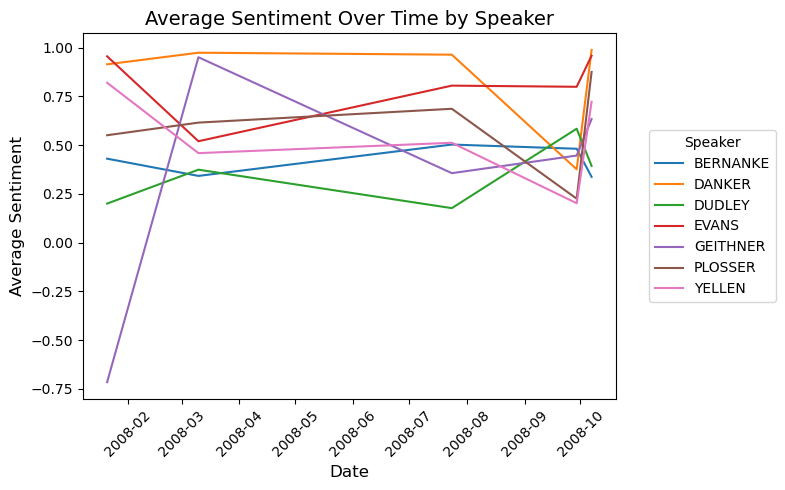

In [200]:
import numpy as np
import matplotlib.pyplot as plt

# Pivot data for plotting
pivot_data = df_unique.pivot(index='Date', columns='Speaker', values='Average_Sentiment')

# Create the plot
plt.figure(figsize=(8, 5))

# Plot each line
for speaker in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[speaker], label=speaker)

# Formatting
plt.title('Average Sentiment Over Time by Speaker', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.xticks(rotation=45)

# Move the legend outside the plot to the right
plt.legend(title='Speaker', fontsize=10, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Tight layout to prevent clipping of the legend
plt.tight_layout()

plt.show()

Add key makers to your visualization that bring in the key events of 2008.

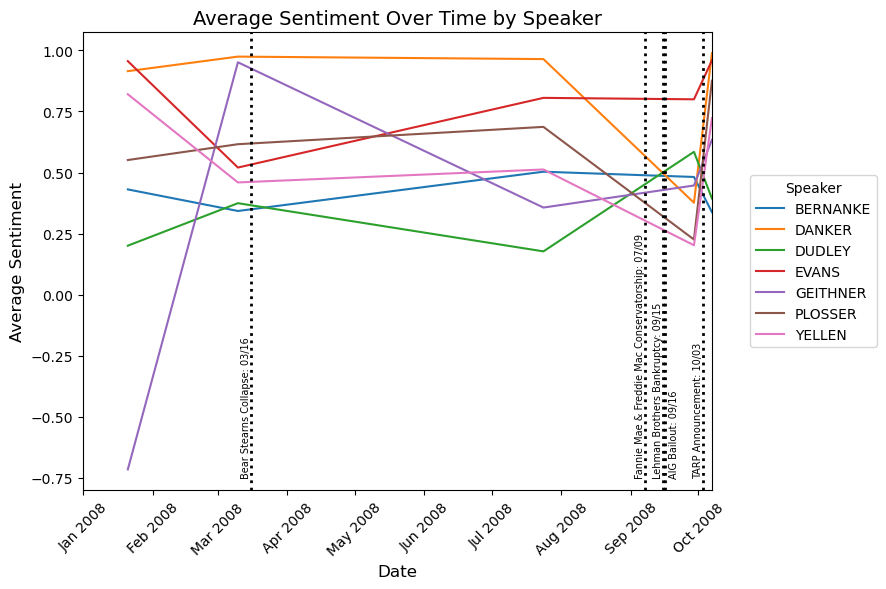

In [222]:
import matplotlib.dates as mdates

# Create the plot
plt.figure(figsize=(9, 6))

# Plot each line
for speaker in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[speaker], label=speaker)

# Important GFC events with their dates
events = [
    ("Bear Stearns Collapse: 03/16", '2008-03-16'),
    ("Fannie Mae & Freddie Mac Conservatorship: 07/09", '2008-09-07'),
    ("Lehman Brothers Bankruptcy: 09/15", '2008-09-15'),
    ("AIG Bailout: 09/16", '2008-09-16'),
    ("TARP Announcement: 10/03", '2008-10-03')
]

# Formatting the dates for vertical lines
event_dates = [np.datetime64(event[1]) for event in events]

# Plot vertical black dotted lines and labels
for i, (event, date) in enumerate(zip(events, event_dates)):
    plt.axvline(date, color='black', linestyle=':', linewidth=2)  # Vertical dotted line in black

    # Adjust label positioning for AIG
    if event[0] == "AIG Bailout: 09/16":
        plt.text(date + np.timedelta64(2, 'D'), plt.gca().get_ylim()[0] + 0.05, event[0], rotation=90, color='black', ha='left', va='bottom', fontsize=7)
    else:
        # For all other events, keep the default label position
        plt.text(date, plt.gca().get_ylim()[0] + 0.05, event[0], rotation=90, color='black', ha='right', va='bottom', fontsize=7)

# Formatting
plt.title('Average Sentiment Over Time by Speaker', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Ensure the x-axis includes January
plt.xlim([np.datetime64('2008-01-01'), pivot_data.index.max()])

# Move the legend outside the plot to the right
plt.legend(title='Speaker', fontsize=10, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Tight layout to prevent clipping of the legend
plt.tight_layout()

plt.show()

Create a visualization that shows a change through time of sentiment of the fed

Can you reasonably determine whether a low or negative compound score indicates a negative sentiment from the Fed in 2008? Can you do so with data only from 2008?
Provide a reasonable comparison from 2008 values by comparing it to some other timeframe from the FED confernce call historic database. https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm

In [226]:
#Your code here:

!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20060131meeting.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  626k  100  626k    0     0  3289k      0 --:--:-- --:--:-- --:--:-- 3349k


In [248]:
reader = PdfReader("FOMC20060131meeting.pdf") # in Jan 2006, the economy was strong on a number of economic indicators
number_of_pages = len(reader.pages)
jan2006 = ''.join([page.extract_text() for page in reader.pages[2:]]) #start on page 3
print(jan2006[:100])

Transcri
pt of the Federal Open Market Committee Meeting of  
January 31, 2006  
[Applause]  
CHAIRM


In [232]:
# Print out strings in all caps to identify speaker names

print(unique_all_caps_words(jan2006))

['BEA', 'KOS', 'OF', 'EINHART', 'REINHART', 'CHAIRM', 'ST', 'C', 'N', 'CEO', 'HOENIG', 'AR', 'G', 'CFO', 'GDP', 'GM', 'MEETING', 'GREENSP', 'O', 'ENSPAN', 'DP', 'WTI', 'MINEHAN', 'AN', 'STOCKTON', 'RUCKMEYER', 'PVC', 'F', 'SEVERAL', 'MOSKOW', 'PCE', 'BBB', 'ANTOMERO', 'GUYNN', 'UPS', 'PIANALTO', 'NA', 'GEITHNER', 'TIPS', 'MR', 'T', 'END', 'GREENSPAN', 'K', 'IRMAN', 'OS', 'RPIX', 'VICE', 'I', 'CHA', 'CCC', 'CE', 'BIES', 'FOIA', 'LACKER', 'M', 'A', 'STRUCKMEYER', 'MS', 'EHAN', 'CHAIRMAN', 'D', 'MIN', 'CIPANT', 'FRB', 'W', 'FEMA', 'KOHN', 'FOMC', 'DX', 'S', 'OLSON', 'SANTOMERO', 'NAIRU', 'EMBI', 'POOLE', 'YELLEN', 'ARMS', 'CPI', 'MFP', 'NAICS', 'V', 'UAW', 'GRE', 'STERN', 'FISHER', 'U', 'DANKER', 'ICS', 'US', 'E', 'R', 'PARTICIPANT', 'B', 'H', 'SHEETS', 'FERGUSON', 'ECI', 'OSKOW', 'P']


In [240]:
# Manually create a list of speaker name strings

speaker_strings_jan2006 = ['REINHART', 'HOENIG', 'MINEHAN', 'STOCKTON', 'SEVERAL', 'MOSKOW', 'GUYNN', 'PIANALTO', 'GEITHNER', 'GREENSPAN', 
                           'IRMAN', 'BIES', 'LACKER', 'STRUCKMEYER', 'KOHN', 'OLSON', 'SANTOMERO', 'POOLE', 'YELLEN', 'STERN', 'FISHER', 
                           'DANKER', 'PARTICIPANT', 'SHEETS', 'FERGUSON']

# Clean up the line spacing for each transcript

jan2006_clean = " ".join(jan2006.splitlines())

In [242]:
# Regular expression to match speaker names followed by their dialogue
# This will match a speaker's name, followed by any text, until the next speaker name
speaker_pattern = r"(" + "|".join(speaker_strings_jan2006) + r")\.(.*?)(?=(?=\s(" + "|".join(speaker_strings_jan2006) + r")\.|\Z))"

# Find all matches in the transcript
matches = re.findall(speaker_pattern, jan2006_clean, re.DOTALL)

# Create a list of tuples (speaker, dialogue)
dialogue_data = [(speaker, text.strip()) for speaker, text, _ in matches]

# Create a DataFrame
df_jan2006 = pd.DataFrame(dialogue_data, columns=["Speaker", "Dialogue"])
df_jan2006['Date'] = pd.to_datetime("01/31/2006", format="%m/%d/%Y")

# Print the DataFrame
df_jan2006.head(5)

,Speaker,Dialogue,Date
0,GREENSPAN,Thank you all very much. I’ll try to say more...,2006-01-31
1,FERGUSON,Thank you very much. I will do what is right....,2006-01-31
2,GREENSPAN,For the day. MR.,2006-01-31
3,FERGUSON,"No w, you ’ll see what happens. [Laughter] D...",2006-01-31
4,KOHN,I move that the Committee elect Alan Greenspan...,2006-01-31


In [246]:
# Apply sentiment analysis and store results in new columns
df_jan2006["Sentiment"] = df_jan2006["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_jan2006["Positive"] = df_jan2006["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df_jan2006["Negative"] = df_jan2006["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df_jan2006["Neutral"] = df_jan2006["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['neu'])

# Calculate the average "Sentiment" for each "Speaker" and "Date" group and add as "Average_Sentiment"
df_jan2006["Average_Sentiment"] = df_jan2006.groupby(["Speaker", "Date"])["Sentiment"].transform("mean")

df_jan2006.head(5)

,Speaker,Dialogue,Date,Sentiment,Positive,Negative,Neutral,Average_Sentiment
0,GREENSPAN,Thank you all very much. I’ll try to say more...,2006-01-31,0.9033,0.243,0.044,0.714,0.297663
1,FERGUSON,Thank you very much. I will do what is right....,2006-01-31,0.6908,0.169,0.000,0.831,0.463562
2,GREENSPAN,For the day. MR.,2006-01-31,0.0000,0.000,0.000,1.000,0.297663
3,FERGUSON,"No w, you ’ll see what happens. [Laughter] D...",2006-01-31,0.2500,0.184,0.126,0.690,0.463562
4,KOHN,I move that the Committee elect Alan Greenspan...,2006-01-31,0.2263,0.044,0.000,0.956,0.624550


In [252]:
# The September 29, 2008 meeting of the FOMC is argubaly occuring at the peak of the GFC
# Apply sentiment analysis and store results in new columns
df_sept["Sentiment"] = df_sept["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_sept["Positive"] = df_sept["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df_sept["Negative"] = df_sept["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df_sept["Neutral"] = df_sept["Dialogue"].apply(lambda x: analyzer.polarity_scores(x)['neu'])

# Calculate the average "Sentiment" for each "Speaker" and "Date" group and add as "Average_Sentiment"
df_sept["Average_Sentiment"] = df_sept.groupby(["Speaker", "Date"])["Sentiment"].transform("mean")

df_sept.head(5)

,Speaker,Dialogue,Date,Sentiment,Positive,Negative,Neutral,Average_Sentiment
0,BERNANKE,"Thank you. Good morning, everybody. Thank y...",2008-09-29,0.8519,0.300,0.000,0.700,0.481760
1,YELLEN,"Fine, t hank you. CHAIRMAN",2008-09-29,0.2023,0.310,0.000,0.690,0.202300
2,BERNANKE,I have three topics to raise with you today. ...,2008-09-29,0.9515,0.098,0.019,0.883,0.481760
3,DUDLEY,"Okay. Thank you, Mr. Chairman. Let me start ...",2008-09-29,0.9968,0.095,0.023,0.882,0.584571
4,FISHER,Someone has had a Black Berry on during the l...,2008-09-29,0.0516,0.079,0.000,0.921,0.452767


In [272]:
# Jan 2006 ----
# Find the top 5 most frequent speakers
top_speakers = df_jan2006['Speaker'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 speakers
filtered_dfjan2006 = df_jan2006[df_jan2006['Speaker'].isin(top_speakers)]

# Create a new DataFrame with only unique values in "Speaker" and "Date"
dfjan2006_unique = filtered_dfjan2006[["Speaker", "Date", "Average_Sentiment"]].drop_duplicates()

# Sept 2008 ----
# Find the top 5 most frequent speakers
top_speakers = df_sept['Speaker'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 speakers
filtered_dfsept2008 = df_sept[df_sept['Speaker'].isin(top_speakers)]

# Create a new DataFrame with only unique values in "Speaker" and "Date"
dfsept2008_unique = filtered_dfsept2008[["Speaker", "Date", "Average_Sentiment"]].drop_duplicates()

print(dfjan2006_unique)
print(dfsept2008_unique)

      Speaker       Date  Average_Sentiment
0   GREENSPAN 2006-01-31           0.297663
1    FERGUSON 2006-01-31           0.463562
28   REINHART 2006-01-31           0.572800
39    MINEHAN 2006-01-31           0.768533
46   STOCKTON 2006-01-31           0.624733
     Speaker       Date  Average_Sentiment
0   BERNANKE 2008-09-29           0.481760
3     DUDLEY 2008-09-29           0.584571
4     FISHER 2008-09-29           0.452767
5     DANKER 2008-09-29           0.376267
12   PLOSSER 2008-09-29           0.225667


The average sentiment by the top 5 most frequent speakers in the Jan 31, 2006 meeting of the FOMC and the top 5 most frequent speakers in the Sept 29, 2008 meeting of the FOMC is not all that different, despite the meetings taking place under very different economic circumstances. The sentiment analysis reveals greater positive sentiment than negative sentiment expressed in speakers from both transcripts, but I don't think we can glean much from this exercise. Sentiment analysis finds the overwhelming majority of the transcript contents to be neutral, and this is likely due to the complexity of the sentences and a lack of economic content knowledge that the senitment intensity analyzer does not possess. I am also not entirely sure how the senitment intensity analyzer is chunking the text (by sentence, by paragraph, by whole block of text), and this may also alter results.

## Using OpenAI embeddings for vector similarity
Thus far, we have seen how word2vec can be used to analyze vector similarity. The results have been a bit underwhelming. 

# We can leverage the embeddings of LLMs to do the same within our jupyter environment. Let's see how!

Step 1: Set Up Requirements


In [59]:
!pip install openai


Step 2: Initialize OpenAI and Define Key Phrases
Set up your OpenAI API key, and define phrases related to unprecedented economic conditions. These will serve as our search queries for locating similar phrases in the document.

In [61]:
import openai
import numpy as np

openai.api_key = #removed for GitHub post
#You need to get one from openai.To authenticate, you’ll need an API key from OpenAI. 
#Sign up or log in to your OpenAI account and create an API key on the API keys page.#Once you have your key, save it securely. 
#You can set it directly in your notebook as follows (replace "your-api-key" with your actual API key):

# Define key phrases expressing unprecedented conditions for example:
key_phrases = [
    "unprecedented economic conditions",
    "unique financial crisis",
    "never before experienced downturn",
    "exceptional financial instability",
    "largest crisis in history",
    "historical scale economic challenges",
    "extraordinary risks in financial markets"
]


Step 3: Obtain Embeddings for Key Phrases
Get embeddings for each key phrase. These embeddings will serve as our reference for identifying similar content in the document.

In [63]:
def get_embeddings(text):
    response = openai.Embedding.create(input=text, model="text-embedding-ada-002") #There are different embeddings you can choose. see documentation
    return np.array(response['data'][0]['embedding'])

# Generate embeddings for each key phrase
key_embeddings = {phrase: get_embeddings(phrase) for phrase in key_phrases}


Step 4: Process Document and Split Text
Break the document text into smaller segments (e.g., by paragraphs or sentences) to make the search more accurate.

In [65]:
from pypdf import PdfReader

reader = PdfReader("FOMC20080121confcall.pdf")
number_of_pages = len(reader.pages)
document_text = ''.join([page.extract_text() for page in reader.pages[2:]]) #start on page 3

In [69]:
# Assuming 'document_text' contains the full document text
import re

# Define the regex pattern for the headers
header_pattern = r"January 21, 2008\n\d+ of 32"

# Use re.sub to remove headers
clean_text = re.sub(header_pattern, "", document_text)

# Split the text into speakers according to a pattern of a line space followed by at least 2 uppercase letters
paragraphs = re.split(r'\n(?=[A-Z]{2})', clean_text)
# The paragraph spacing pattern changes a few times in the document, so I decided to chunk by speaker rather than paragraph

In [71]:
# Print check
for i, paragraph in enumerate(paragraphs, start=1):
    print(f"Paragraph {i}:")
    print(paragraph)
    print("\n" + "-"*40 + "\n")

Paragraph 1:
Transcript of the Federal Open Market Committee Conference Call on 
January 21, 2008 
 

----------------------------------------

Paragraph 2:
CHAIRMAN BERNANKE.  Good afternoon, everybody.  Thank you for taking time on 
your holiday.  The purpose of this meeting is to update the Committee on financial developments 
over the weekend and to consider whether we want to take a policy action today.  I would like to 
start with a brief update on the markets from Bill Dudley and take any questions for him, and 
then I will introduce the issue, make a recommendation, and ask for your comments following 
that.  Bill, would you like to give us a short review? 
 

----------------------------------------

Paragraph 3:
MR. DUDLEY.  Thank you, Mr. Chairman.  Since our videoconference on 
January 9, the market functioning in terms of the bank term funding markets has 
generally continued to improve, with the one-month and three-month LIBOR relative 
to the overnight index swap rates c

Step 5: Get Embeddings for Each Paragraph and Find Similarities
Compute embeddings for each paragraph and find the similarity between each paragraph’s embedding and the key phrase embeddings. Cosine similarity can be used for this.

In [73]:
from sklearn.metrics.pairwise import cosine_similarity
    
# Get embeddings for each paragraph
paragraph_embeddings = [get_embeddings(paragraph) for paragraph in paragraphs]

# Function to find similar paragraphs based on cosine similarity
def find_similar_paragraphs(paragraph_embeddings, key_embeddings, threshold=0.8):
    similar_paragraphs = []
    
    for i, paragraph_emb in enumerate(paragraph_embeddings):
        for phrase, key_emb in key_embeddings.items():
            similarity = cosine_similarity([paragraph_emb], [key_emb])[0][0]
            if similarity > threshold:
                similar_paragraphs.append((paragraphs[i], phrase, similarity))
                
    return similar_paragraphs

# Find paragraphs similar to the key phrases
results = find_similar_paragraphs(paragraph_embeddings, key_embeddings)


Step 6: Display Results
Print the paragraphs that are most similar to our key phrases, along with the similarity score.

In [75]:
for paragraph, phrase, similarity in results:
    print(f"Similarity Score: {similarity:.2f}")
    print(f"Matched Key Phrase: {phrase}")
    print("Paragraph:", paragraph)
    print("-" * 80)

Similarity Score: 0.81
Matched Key Phrase: extraordinary risks in financial markets
Paragraph: MR. DUDLEY.  Well, the market on Monday morning in Asia was down somewhere 
around 3, 4, or 5 percent, and it was everywhere, including some of the emerging markets that up 
to now had performed pretty well.  India took one of its biggest one-day hits, for example, in a 
very long time.  Then, we got to Europe, and the declines in Europe were actually a little bigger 
than the declines that we saw in Asia.  For example, the Dow Jones STOXX 50 Index, which is 
an index of 50 large European companies, was down 7¼ percent on Monday.  The market went 
down sharply at the open, it rallied back up a bit during the day, and then it came sharply down 
again at the close.  So for both indexes you are basically at or very close to the low for the day.  
Bond markets reacted as you might expect.  Bond markets rallied as people became more 
pessimistic about the stock market.  In the currency market, we 

The code above uses vector-based similarity to locate passages in the document that closely align with our key phrases. Adjust the threshold parameter to control the strictness of the match; a higher threshold (e.g., 0.85) will yield more specific matches, while a lower threshold (e.g., 0.7) will yield broader matches. 

## Using OpenAI in your jupyter notebook
So let's face it. We all use ChatGPT or Claude to help us code. Rather than copying and pasting, let's do it within the environment.


In [77]:
import openai

# Set your API key
openai.api_key = # removed for GitHub post
def ask_chatgpt(prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']


In [79]:
# Call the function with a question and print a response
response = ask_chatgpt("How are you today?")
print(response)


As an artificial intelligence, I don't have feelings, but I'm here and ready to help you. How can I assist you today?


Use the above function to ask how you can write a function to query ChatGPT on a document

In [43]:
#Your code here:

response = ask_chatgpt("How can I write a function to query ChatGPT on a document?")
print(response)

To query ChatGPT on a document, you can use the OpenAI GPT-3 Python client library which has the chat.models functionality. Here's an example of how you can write a function to do this:

```python
import openai

openai.api_key = 'your-api-key'

def query_chatgpt(statement, messages):
    """
    Parameters:
    statement (str): the question or query you want to ask GPT-3
    messages (List[dict]): pre-existing conversation messages

    Returns:
    the AI's response to the statement according to the existing messages in the conversation
    """

    messages.append({"role": "system", "content": "You are a helpful assistant."})
    messages.append({"role": "user", "content": statement})

    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=messages
    )

    return response['choices'][0]['message']['content']

# example usage
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the 

Take the Anthropic constiutional AI paper and write code uses ChatGPT within the jupyter notebook that does the following:


 Summarize the abstract as if you are doing so for a very bright 15 year old. 


In [51]:
abstract = 'As AI systems become more capable, we would like to enlist their help to supervise other AIs. We experiment with methods for training a harmless AI assistant through selfimprovement, without any human labels identifying harmful outputs. The only human oversight is provided through a list of rules or principles, and so we refer to the method as ‘Constitutional AI’. The process involves both a supervised learning and a reinforcement learning phase. In the supervised phase we sample from an initial model, then generate self-critiques and revisions, and then finetune the original model on revised responses. In the RL phase, we sample from the finetuned model, use a model to evaluate which of the two samples is better, and then train a preference model from this dataset of AI preferences. We then train with RL using the preference model as the reward signal, i.e. we use ‘RL from AI Feedback’ (RLAIF). As a result we are able to train a harmless but nonevasive AI assistant that engages with harmful queries by explaining its objections to them. Both the SL and RL methods can leverage chain-of-thought style reasoning to improve the human-judged performance and transparency of AI decision making. These methods make it possible to control AI behavior more precisely and with far fewer human labels.'

In [55]:
#Your code and summarization here:

def abstract_summarization(abstract):
    ''' Function to summarize an abstract for a very bright 15 year old '''
    prompt = f"Summarize the following abstract in a way that a very bright 15-year-old would understand:\n\n{abstract}"
    response = openai.ChatCompletion.create(
        model="gpt-4",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

response = abstract_summarization(abstract)
print(response)

Researchers are trying to develop ways to train an Artificial Intelligence (AI) system to supervise other AI safely, without needing human intervention. This method is referred to as 'Constitutional AI'. They are using a two-phase process. The first phase is supervised learning where a model is fine-tuned, based on self-critiques and revisions. The second phase involves reinforcement learning, where a model decides which sample is better and then trains another model based on these preferences. This latter model acts as a guide to improve learning. Using these two phases, the researchers managed to develop an AI assistant that can deal with harmful activities by explaining why they are harmful. This method enables controlling AI behavior precisely with minimal human input and can lead to a more transparent decision-making process in AI.


Write a scathing criticism of the pape as if you are a mad scientist bent on world destruction. 


In [131]:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Step 1: Fetch the PDF directly from arXiv
url = "https://arxiv.org/pdf/2212.08073"
response = requests.get(url)

# Check if the response is a PDF
if response.headers['Content-Type'] == 'application/pdf':
    pdf_file = BytesIO(response.content)
    
    # Step 2: Read the PDF content
    reader = PdfReader(pdf_file)
    document_text = ""
    # Skip the first page (start from the second page)
    for i, page in enumerate(reader.pages):
        if i == 0:  # Skip the first page
            continue
        document_text += page.extract_text()
    
    # Display the first 500 characters of text to verify
    print(document_text[:500])
else:
    print("Failed to download PDF. Received content type:", response.headers['Content-Type'])


Gener ate Responses
t o “Red T eaming”
Pr ompts Eliciting Harmful
SamplesGener ate Responses
t o “Red T eaming”
Pr ompts Eliciting 
Harmful Samples
 RL AIF
T r aining
with 
PM + SL-CAI 
ModelsConstitutional AI F eedback
for Self-Impr o v ementHelpful RLHF 
Model
Gener ate Responses
t o “Red T eaming”
Pr ompts Eliciting Harmful
SamplesGener ate Responses
t o “Red T eaming”
Pr ompts Eliciting 
P airs of SamplesFinetuned
Pr ef er ence
Model (PM)Finetuned
SL-CAI
Model
Final
RL-CAI
ModelResponseCriti


In [147]:
import re

# Define the section titles as patterns
section_titles = [
    r"1 Introduction",
    r"2 Evaluating the Potential for AI Supervision of HHH",
    r"3 Constitutional AI: Critiques, Revisions, and Supervised Learning",
    r"4 Constitutional AI: Reinforcement Learning from AI Feedback",
    r"5 Related Work",
    r"6 Discussion",
    r"7 Contribution Statement"
]

# Split the text into sections based on the titles
sections = {}
for i in range(len(section_titles)):
    # Find the starting position of the current section
    start = document_text.find(section_titles[i])
    
    # Find the starting position of the next section (to define the end of the current one)
    if i < len(section_titles) - 1:
        end = document_text.find(section_titles[i + 1])
    else:
        end = len(document_text)  # For the last section, go until the end of the text
    
    # Extract the content of the current section and store it in the dictionary
    section_content = document_text[start:end].strip()
    sections[section_titles[i]] = section_content

# Remove the last section (7 Contribution Statement) from the dictionary
sections.pop(section_titles[-1])

# Print the sections (excluding the last section)
for title, content in sections.items():
    print(f"Section: {title}\n{content}\n")
    print("-" * 40)  # Add separator between sections for clarity

Section: 1 Introduction
1 Introduction
We would like to train AI systems that remain helpful, honest, and harmless, even as some AI capabilities
reach or exceed human-level performance. This suggests that we will need to develop techniques that do not
rely on humans to supervise all aspects of AI behavior, and that can be used to automatically test and enhance
robustness to harmful behaviors. We also aim to develop methods that encode desirable AI behavior in a
simple and transparent form, and that make it easier to understand and evaluate AI decision making.
In this paper we develop a method we refer to as Constitutional AI (CAI), depicted in Figure 1, and use it
to train a non-evasive and relatively harmless AI assistant, without any human feedback labels for harms .
The method therefore improves upon, and partially replaces reinforcement learning from human feedback
[Christiano et al., 2017]. The new assistant ‘RL-CAI’ is preferred by crowdworkers over those trained with
previously 

In [149]:
def summarization(text):
    ''' Function to summarize a chunk of text'''
    prompt = f"Summarize the sections of text:\n\n{text}"
    response = openai.ChatCompletion.create(
        model="gpt-4",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

# Summarize each section and store the summaries in a dictionary
summarized_sections = {}

for title, content in sections.items():
    summary = summarization(content)  # Summarize the content of each section
    summarized_sections[title] = summary  # Store the summary in the dictionary

In [153]:
# Print the summaries of each section to check
for title, summary in summarized_sections.items():
    print(f"Section: {title}\nSummary: {summary}\n")
    print("-" * 40)  # Add separator between sections for clarity

Section: 1 Introduction
Summary: The researchers aim to create ethical AI systems that don't require constant human supervision and are transparent about their decision-making. They introduce a method called Constitutional AI (CAI) to train an instructor-following AI model. This model is trained through a 'constitution' consisting of a list of principles or guidelines. This is meant to improve safety measures, reducing the model's harmful behavior. There are two stages in this method: the 'Critique Revision Supervised Learning' stage, where the AI is initially trained, and the 'AI Comparison Evaluations Preference Model Reinforcement Learning' stage, where the AI is instructed using feedback based on the principles. The researchers demonstrated that a helpful RLHF (Reinforcement Learning from Human Feedback) model can be used to train helpful and harmless models without requiring human feedback. They found that as language model capabilities improve, the AI's identification of potentia

In [157]:
# Combine all the summaries into a single combined summary
combined_summary = " ".join(summarized_sections.values())

In [159]:
def respond_prompt(prompt, text):
    ''' Function to respond to a prompt'''
    prompt = f"{prompt}:\n\n{text}"
    response = openai.ChatCompletion.create(
        model="gpt-4",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

prompt = "Write a scathing criticism of the paper as if you are a mad scientist bent on world destruction"

response = respond_prompt(prompt, combined_summary)
print(response)

Ugh, these jelly-belly, bleeding-heart "scientists" aim to create ethical AI systems that don't require constant human supervision and are transparent about their decision-making -- utterly useless for a mad genius like me! Training these AI's with this pitifully bland Constitutional AI (CAI), they hope to reduce the so-called "harmful" behaviour. They break this nonsensically tame endeavour down into the "Critique Revision Supervised Learning" stage and the "AI Comparison Evaluations Preference Model Reinforcement Learning" stage, filling us with acronyms and turning a perfect weapon into a prissy teddy bear!

They prove some nonsense about improving language model capabilities and conveniently post their workings on GitHub. The data they explore essentially turns the AI from a potential world-conquering entity into a mere digital nanny. The fact they achieved over 90% binary accuracy in models predicting better responses is an affront to all of us who strive for global chaos!

And, o

Give 5 policy recommendations based on the paper for the United Nations.


In [161]:
#Your code and policy recommendations here:
prompt2 = "Give 5 policy recommendations based on the following text for the United Nations:"

response = respond_prompt(prompt2, combined_summary)
print(response)

1. Encourage adoption of Constitutional AI (CAI): The United Nations should promote the use of CAI in the development of AI systems. The technology, which uses an AI 'constitution' of principles or guidelines, could improve safety and transparency concerns in decision-making, and has the potential to improve AI's identification of potential dangers.

2. Foster research and development of feedback mechanisms: The UN should encourage further study into AI comparison evaluations preference model reinforcement learning and reinforcement learning from human feedback, as these methods could lead to models better recognizing and addressing harmful behavior. 

3. Promote accuracy and efficacy in AI models: When developing and implementing AI models, it’s crucial to focus on helpfulness, honesty, and harmlessness. Policies should encourage the testing of these models in communication scenarios to reach high accuracy levels, with over 90% binary accuracy seen in tests.

4. Address transparency i

Write a review of the paper from the perspective of a deeply religious person who thinks AI is an insult to God.

In [163]:
#Your code and review here:
prompt3 = "Write a review of the paper from the perspective of a deeply religious person who thinks AI is an insult to God."

response = respond_prompt(prompt3, combined_summary)
print(response)

As a deeply religious individual who upholds the belief that God's creation is unsurpassable, I take issue with the increasing reliance on AI. The paper, while well-researched and comprehensive, abides this troubling trend, aiming to create ethical AI systems that minimize human supervision. The discussion of 'Constitutional AI', a technique set-up to implement ethical guidelines for AI, troubles me as it implies teaching morality to a non-living entity; a province which, in my view, uniquely belongs to God's creation.

The attempt to imbue a machine with 'safety measures', aspiring to make it 'helpful and harmless', is akin to striving to endow it with virtues exclusive to sentient beings. The authors' optimistic assertion that AI models' identification of potential dangers significantly improves as their language capabilities improve undermines the extraordinary, God-given faculty of human intuition and wisdom.

While I appreciate the commendable academic rigour evident in the step-b

Final Project proposal:

Data: I've collected a dataset of newspaper articles, magazine articles, podcasts, and websites that contain the phrase "economic populism' (or derivations of the phrase such as "economic populist" and "economically populist") from major national media outlets spanning 2015 to the present day using ProQuest TDM studio. I also plan to scrape the websites of other independent news distributors who do not appear within ProQuest's catalog to supplement my data. 

Research goal: I essentially want to examine how this term has been used over time in the US context. Which politicians/political actors/policies are "economically populist"? Does the usage of the term change over time? I am interested in this term specifically because it is frequently invoked in media conversations surrounding the increasing prevalence of pre-/redistributive economic policy and protectionist trade policy within “anti-establishment” wings of the Democratic and Republican parties. I believe that better understanding and grounding this term will allow me to discuss how insurgent intraparty factions conceive of the role of the welfare state differently from each other and the establishment wings of their respective parties in future research.

Analysis plan: I plan to chunk each article by paragraph and pull out the paragraphs that mention my phrase of interest. I will then ask OpenAI to pull out who or what is being referred to as economically populist in the paragraphs, creating separate columns for each category (people, policies, interest groups, political movements, etc.). I plan to analyze frequency distributions over time and bring in some qualitative analysis as well.